In [5]:
import sys
import os

# Add src folder to sys.path (corrected!)
sys.path.append(os.path.abspath('../../../src'))

# Now import
import clean_dependency_ratio_data
import clean_health_data

# Set file paths
health_raw_path = '../../../data/raw/health_expenditure_raw.csv'
dependency_raw_path = '../../../data/raw/dependency_ratio_raw.csv'

health_output_path = '../../../data/raw/health_expenditure_long.csv'
dependency_output_path = '../../../data/raw/dependency_ratio_long.csv'

# Clean and save datasets
df_health = clean_health_data.clean_health_data(
    raw_path=health_raw_path,
    output_path=health_output_path
)

df_dependency = clean_dependency_ratio_data.dependency_ratio_data(
    raw_path=dependency_raw_path,
    output_path=dependency_output_path
)

# Display a quick preview
print("Health Expenditure Data:")
print(df_health.head())

print("\nDependency Ratio Data:")
print(df_dependency.head())


Health Expenditure Data:
   Country ISO3  Year  Health_Expenditure
0  Andorra  AND  2000            5.952764
1  Andorra  AND  2001            5.858237
2  Andorra  AND  2002            5.996212
3  Andorra  AND  2003            5.547715
4  Andorra  AND  2004            5.288469

Dependency Ratio Data:
   Country ISO3  Year  Dependency_Ratio
0  Andorra  AND  2000         38.260924
1  Andorra  AND  2001         38.989848
2  Andorra  AND  2002         39.556404
3  Andorra  AND  2003         38.880339
4  Andorra  AND  2004         37.326780


In [6]:
# Combine the two datasets
import pandas as pd  # (just in case you didn't import pd before)

df_combined = pd.merge(
    df_health,
    df_dependency,
    on=['Country', 'ISO3', 'Year'],
    how='inner'
)

# Save combined dataset (optional)
df_combined.to_csv('../../../data/raw/combined_health_dependency.csv', index=False)

# Display the first few rows
print("Combined Data:")
print(df_combined.head())


Combined Data:
   Country ISO3  Year  Health_Expenditure  Dependency_Ratio
0  Andorra  AND  2000            5.952764         38.260924
1  Andorra  AND  2001            5.858237         38.989848
2  Andorra  AND  2002            5.996212         39.556404
3  Andorra  AND  2003            5.547715         38.880339
4  Andorra  AND  2004            5.288469         37.326780


Descriptive Statistics by Country:
      Year                                                            \
     count    mean       std     min     25%     50%     75%     max   
ISO3                                                                   
CHN   21.0  2010.0  6.204837  2000.0  2005.0  2010.0  2015.0  2020.0   
GBR   21.0  2010.0  6.204837  2000.0  2005.0  2010.0  2015.0  2020.0   
JPN   21.0  2010.0  6.204837  2000.0  2005.0  2010.0  2015.0  2020.0   
USA   21.0  2010.0  6.204837  2000.0  2005.0  2010.0  2015.0  2020.0   

     Health_Expenditure             ...                        \
                  count       mean  ...        75%        max   
ISO3                                ...                         
CHN                21.0   4.553864  ...   4.938280   5.593597   
GBR                21.0   9.224129  ...   9.847713  11.965477   
JPN                21.0   9.210958  ...  10.674387  11.209037   
USA                21.0  15.575132  ...  16.481600  18.813253   

    

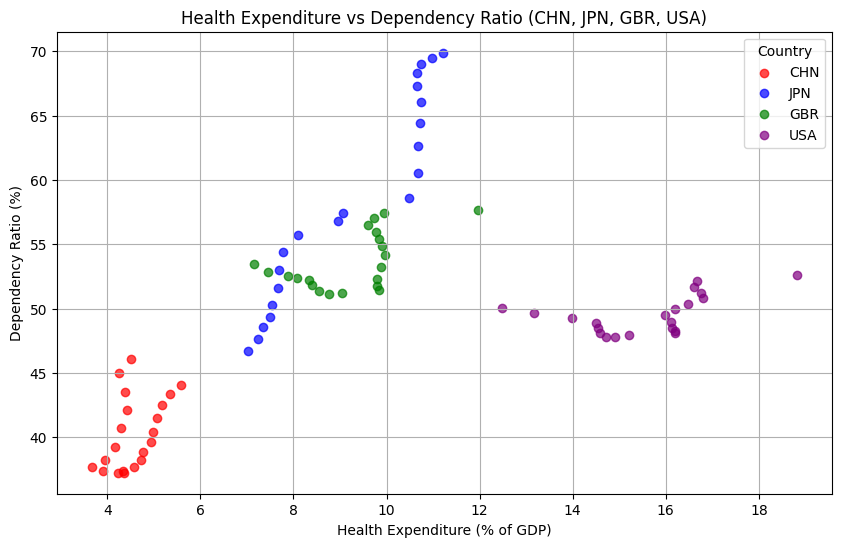

In [7]:
# Select only CHN, JPN, GBR, USA
selected_countries = ['CHN', 'JPN', 'GBR', 'USA']
df_selected = df_combined[df_combined['ISO3'].isin(selected_countries)]

# Descriptive stats for each country
desc_by_country = df_selected.groupby('ISO3').describe()
print("Descriptive Statistics by Country:")
print(desc_by_country)

# Plot scatter with different colors
import matplotlib.pyplot as plt

colors = {
    'CHN': 'red',
    'JPN': 'blue',
    'GBR': 'green',
    'USA': 'purple'
}

plt.figure(figsize=(10, 6))

for country_code in selected_countries:
    country_data = df_selected[df_selected['ISO3'] == country_code]
    plt.scatter(
        country_data['Health_Expenditure'],
        country_data['Dependency_Ratio'],
        label=country_code,
        color=colors[country_code],
        alpha=0.7
    )

plt.title('Health Expenditure vs Dependency Ratio (CHN, JPN, GBR, USA)')
plt.xlabel('Health Expenditure (% of GDP)')
plt.ylabel('Dependency Ratio (%)')
plt.grid(True)
plt.legend(title='Country')
plt.show()


In [9]:
# Descriptive stats by country
desc_by_country = df_selected.groupby('ISO3').describe()

# Save to CSV
desc_by_country.to_csv('../../../data/raw/descriptive_stats_by_country.csv')

# (Optional) Save to Excel
desc_by_country.to_excel('../../../data/raw/descriptive_stats_by_country.xlsx')

print("Descriptive statistics saved successfully!")


Descriptive statistics saved successfully!
